<a href="https://colab.research.google.com/github/SergeyShchus/Data-analysis-Notebooks/blob/main/Notebooks/PyGIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Огляд цікавого курсу https://pygis.io/docs/b_getting_started.html

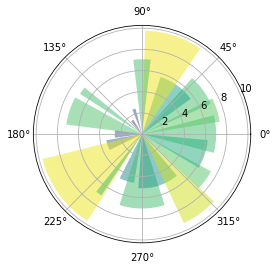

In [ ]:
#Довільна програма: http://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_bar.html .

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
θ = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(θ, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

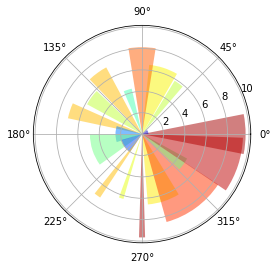

In [ ]:
#Інший варіант діаграми

# Compute pie slices
N = 20

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

#Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

plt.show()

In [ ]:
#приклад рандома

np.random.randn(3)

array([ 1.34685132, -0.80423784,  1.83322987])

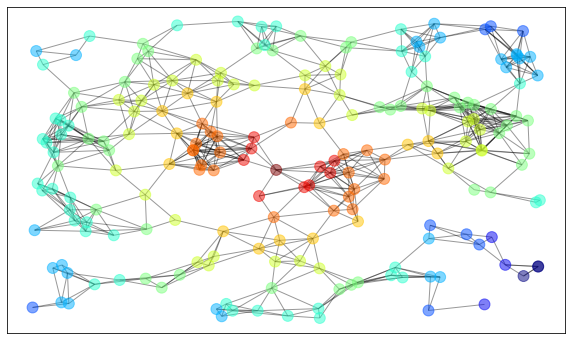

In [ ]:
#приклад коду, який генерує та будує випадковий графік із кольором вузла,
#який визначається довжиною найкоротшого шляху від центрального вузла.
#Детальніше - https://python-programming.quantecon.org/about_py.html

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()

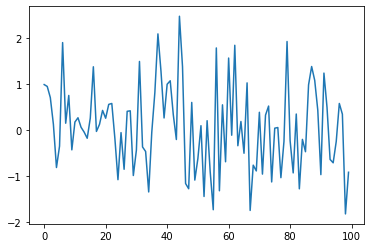

In [ ]:
#Побудувати білий шум

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

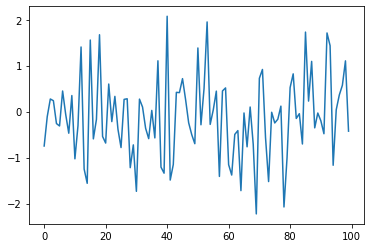

In [ ]:
#Побудувати білий шум
#Версія з циклом For 

ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

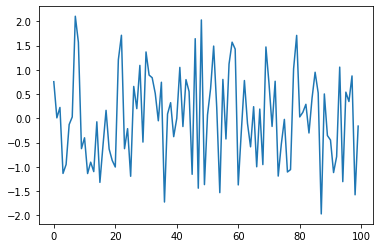

In [ ]:
#Побудувати білий шум
#Версія з циклом While

ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1
plt.plot(ϵ_values)
plt.show()

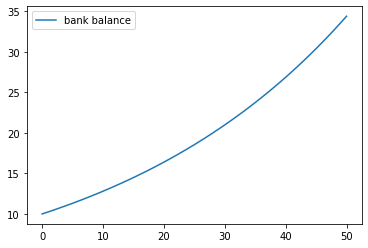

In [ ]:
#графік балансу банківського рахунку в часі.

r = 0.025         # interest rate
T = 50            # end date
b = np.empty(T+1) # an empty NumPy array, to store all b_t
b[0] = 10         # initial balance

for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label='bank balance')
plt.legend()
plt.show()

In [ ]:
#фіктивні дані в пандас

import pandas as pd
np.random.seed(1234)

data = np.random.randn(5, 2)  # 5x2 matrix of N(0, 1) random draws
dates = pd.date_range('28/12/2010', periods=5)

df = pd.DataFrame(data, columns=('price', 'weight'), index=dates)
print(df)

               price    weight
2010-12-28  0.471435 -1.190976
2010-12-29  1.432707 -0.312652
2010-12-30 -0.720589  0.887163
2010-12-31  0.859588 -0.636524
2011-01-01  0.015696 -2.242685


In [ ]:
!pip install geopandas

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [ ]:
#Три умовні пункти просторових даних

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


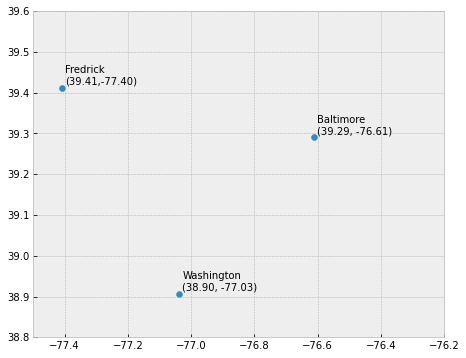

In [ ]:
#Відображення просторових даних на мапі

plt.style.use('bmh') # better for plotting geometries vs general plots.

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

<AxesSubplot:>

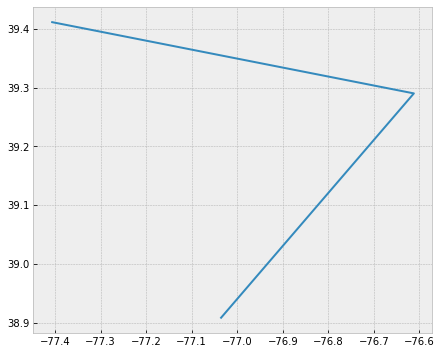

In [ ]:
#З*єднати точки лініями

from shapely.geometry import LineString

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)

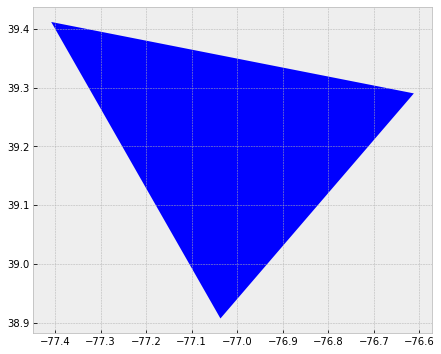

In [ ]:
#З*єднати точки полігоном

from shapely.geometry import Polygon

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

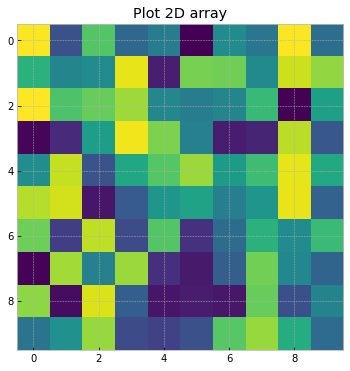

In [ ]:
#рандомний растр

import numpy as np

X=np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

In [ ]:
#дані по замовчуванню у gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

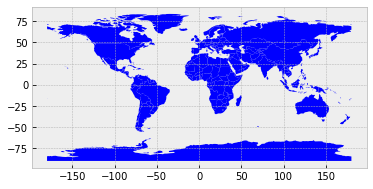

In [ ]:
world.plot()

<AxesSubplot:>

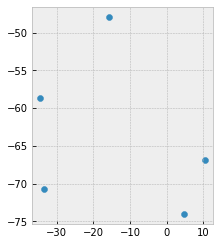

In [ ]:
# list of attributes and coordinates
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'lat': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'lon': [-58.66, -47.91, -70.66, -74.08, -66.86]})

# Create a Shapely points from the coordinate-tuple list
ply_coord = [Point(x, y) for x, y in zip(df.lat, df.lon)]

# Convert shapely object to a geodataframe with a crs
poly = gpd.GeoDataFrame(df, geometry=ply_coord, crs ="EPSG:4326")

# Let's see what we have
poly.plot()

In [ ]:
import pandas as pd
# create an outline of Washington DC and write to csv
path_to_csv = r'../points.csv'
points = {'Corner':['N','E','S','W'],
          'lon': [-77.0412826538086, -77.11681365966797, -77.01896667480469, -77.0412826538086], 
          'lat': [38.99570671505043, 38.936713143230044, 38.807610542357594, 38.99570671505043]}
points = pd.DataFrame.from_dict(points)
points.to_csv(path_to_csv)     

# read the point data in 
df = pd.read_csv(path_to_csv)

# Create a geodataframe from the data using and 'EPSG' code to assign WGS84 coordinate reference system
points= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat), crs = 'EPSG:4326')
points

,Unnamed: 0,Corner,lon,lat,geometry
0,0,N,-77.041283,38.995707,POINT (-77.04128 38.99571)
1,1,E,-77.116814,38.936713,POINT (-77.11681 38.93671)
2,2,S,-77.018967,38.807611,POINT (-77.01897 38.80761)
3,3,W,-77.041283,38.995707,POINT (-77.04128 38.99571)


<AxesSubplot:>

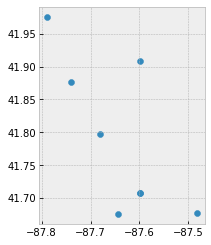

In [ ]:
from io import StringIO 
data = """
ID,X,Y,Speed
1,  -87.789,  41.976,  16
1,  -87.482,  41.677,  17
2,  -87.739,  41.876,  16
2,  -87.681,  41.798,  16
2,  -87.599,  41.708,  16
3,  -87.599,  41.908,  17
3,  -87.598,  41.708,  17
3,  -87.643,  41.675,  17
"""
# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep=',')


#zip the coordinates into a point object and convert to a GeoData Frame
points = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry=points, crs = 'EPSG:4326')
geo_df.plot()

<AxesSubplot:>

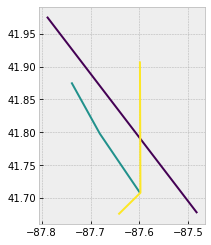

In [ ]:
# treat each `ID` group of points as a line
lines = geo_df.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))

# store as a GeodataFrame and add 'ID' as a column (currently stored as the 'index')
lines = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326") 
lines.reset_index(inplace=True)
lines.plot(column='ID')

<AxesSubplot:>

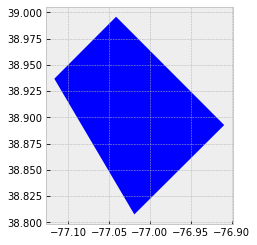

In [ ]:
#Створення просторових багатокутників


# list of coordindate pairs
coordinates = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
               [-76.90910339355469,  38.892636142310295]]           

# Create a Shapely polygon from the coordinate-tuple list
ply_coord = Polygon(coordinates)

# create a dictionary with needed attributes and required geometry column
df = {'Attribute': ['name1'], 'geometry': ply_coord}

# Convert shapely object to a geodataframe 
poly = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
poly.plot()

Empty GeoDataFrame
Columns: [geometry]
Index: []


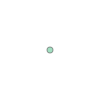

In [ ]:
#Створення просторових точок

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

print(newdata)


# Coordinates of the GW department of geography in Decimal Degrees
coordinates = (-77.04639494419096,  38.89934963421794)

# Create a Shapely polygon from the coordinate-tuple list
point = Point(coordinates)

# Let's see what we have
point

In [ ]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = point

# Let's see what we have now
#newdata


# Add a new column and insert data
newdata.loc[0, 'Location'] = 'GWU Geography'

# Let's check the data
newdata

,geometry,Location
0,POINT (-77.04639 38.89935),GWU Geography


In [ ]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: D:\install\Postgres\PostgreSQL\14\share\contrib\postgis-3.3\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.

In [ ]:
# Determine the output path for the Shapefile
outfp = r"../gwu_geog.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

In [ ]:
#растр

import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

array([[-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.]])

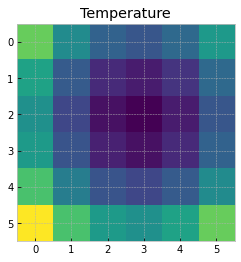

In [ ]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

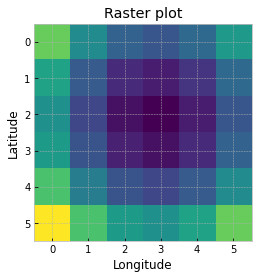

In [ ]:
#створення растра, збереження у файл та відображення

from rasterio.transform import Affine
import rasterio as rio

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# open in 'write' mode, unpack profile info to dst
with rio.open(
    "../new_raster.tif",
    "w",
    driver="GTiff",         # output file type
    height=Z.shape[0],      # shape of array
    width=Z.shape[1],
    count=1,                # number of bands
    dtype=Z.dtype,          # output datatype
    crs="+proj=latlong",    # CRS
    transform=transform,    # location and resolution of upper left cell
) as dst:
    # check for number of bands
    if dst.count == 1:
        # write single band
        dst.write(Z, 1)
    else:
        # write each band individually
        for band in range(len(Z)):
            # write data, band # (starting from 1)
            dst.write(Z[band], band + 1)


with rio.open("../new_raster.tif") as src:
    # read the raster data
    Z = src.read(1)
    # get the metadata
    transform = src.transform
    crs = src.crs

# plot the raster
plt.imshow(Z)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Raster plot')
plt.show()

In [ ]:
!pip install contextily

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ProxyError: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_all/6/32/31.png (Caused by ProxyError('Your proxy appears to only use HTTP and not HTTPS, try changing your proxy URL to be HTTP. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#https-proxy-error-http-proxy', SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1123)'))))

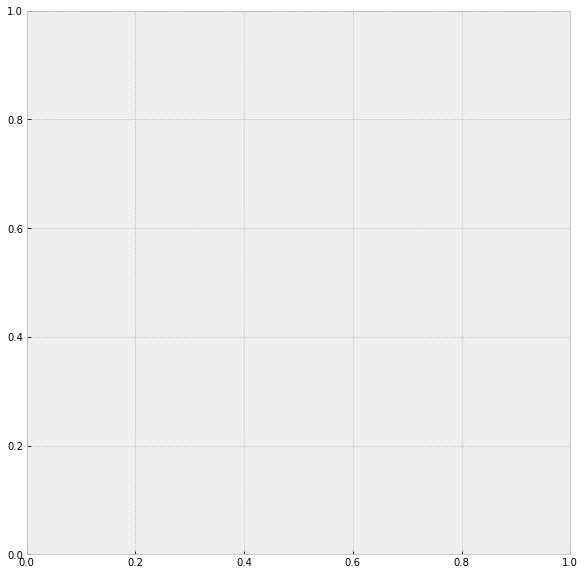

In [ ]:
import geopandas
import contextily as ctx
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities = cities[cities.name == 'Washington, D.C.']
cities = cities.to_crs(epsg=3857) # project to webmercator

ax = cities.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom = 6, reset_extent = True)

CRS

In [ ]:
# Import module
import geopandas as gpd

# Read data (shapefile)
dc = gpd.read_file("https://opendata.arcgis.com/datasets/7241f6d500b44288ad983f0942b39663_10.geojson")

In [ ]:
# Import module
import matplotlib.pyplot as plt

def map_data(data, header):
    '''Function superimposes all the data on a map and sets a title for the map.'''    
    
    # Create subplots
    fig, ax = plt.subplots(figsize = (10, 5))
    
    # Set colors
    colors = ["#a3ddcb", "#03506f"]
    
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = colors[i], ax = ax)
    
    # Add title
    plt.title(header)
    
    # Utilize BMH plotting style
    plt.style.use("bmh")
    
    # Remove empty white space around the plot
    plt.tight_layout()

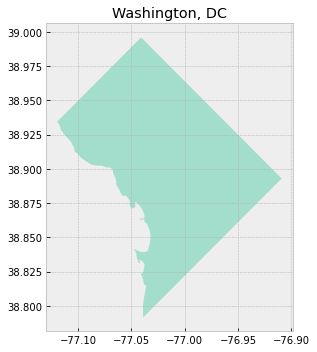

In [ ]:
# Create map using DC shapefile
map_data([dc], "Washington, DC")

In [ ]:
# Get CRS for DC shapefile
print("CRS: {}".format(dc.crs))

CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [ ]:
#проектування копіі наших даних

# Example 1: Create a copy of the DC shapefile
dc_reproject_proj4 = dc.copy()

# Example 1: Reproject the data to NAD83 using PROJ.4 string
# Source: https://spatialreference.org/ref/epsg/nad83/
dc_reproject_proj4 = dc_reproject_proj4.to_crs("+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs")


# Example 2: Create a copy of the DC shapefile
dc_reproject_epsg = dc.copy()

# Example 2: Reproject the data to NAD83 using EPSG code
dc_reproject_epsg = dc_reproject_epsg.to_crs(epsg=4269)

In [ ]:
# Example 1: Print new CRS of DC
print("Example 1 (PROJ.4 string) CRS: {}".format(dc_reproject_proj4.crs))

# Example 2: Print new CRS of DC
print("Example 2 (EPSG code) CRS: {}".format(dc_reproject_epsg.crs))

Example 1 (PROJ.4 string) CRS: +proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs +type=crs
Example 2 (EPSG code) CRS: EPSG:4269


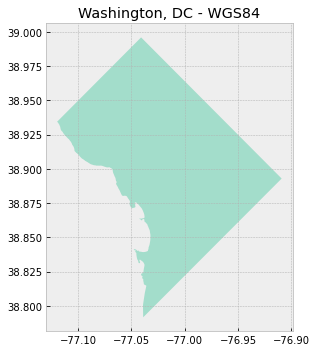

In [ ]:
# Map original DC shapefile
map_data([dc], "Washington, DC - WGS84")

Geometry of shapefile:
0    POLYGON ((1106986.814 4694966.592, 1106987.033...
Name: geometry, dtype: geometry


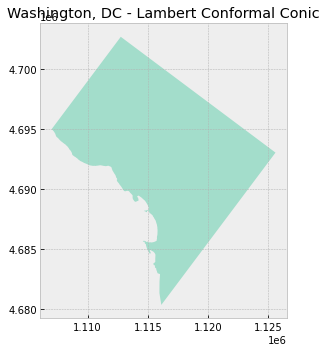

In [ ]:
# Create a copy of the DC shapefile
dc_lcc = dc.copy()

# Reproject the data to Lambert Conformal Conic
# Source: https://proj.org/operations/projections/lcc.html
dc_lcc = dc_lcc.to_crs("+proj=lcc +lon_0=-90 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc], "Washington, DC - Lambert Conformal Conic")

# Check geometry values
print("Geometry of shapefile:\n{}".format(dc_lcc['geometry'].head()))

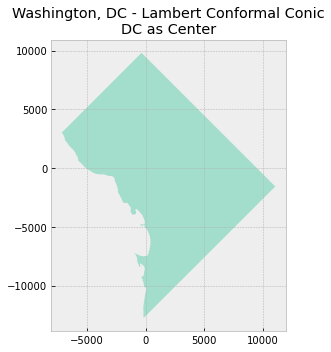

In [ ]:
# Create a copy of the DC shapefile
dc_lcc_center = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point
dc_lcc_center = dc_lcc_center.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_center], "Washington, DC - Lambert Conformal Conic\nDC as Center")

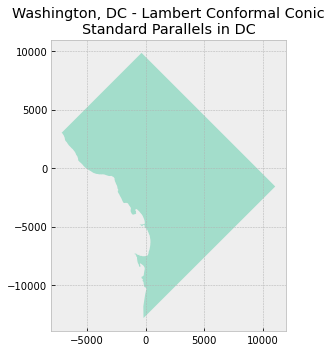

In [ ]:
# Create a copy of the DC shapefile
dc_lcc_parallels_1 = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point and standard parallels
dc_lcc_parallels_1 = dc_lcc_parallels_1.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1], "Washington, DC - Lambert Conformal Conic\nStandard Parallels in DC")

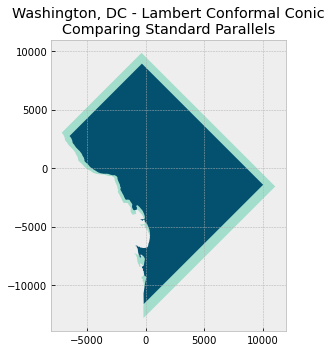

In [ ]:
# Create a copy of the DC shapefile
dc_lcc_parallels_2 = dc.copy()

# # Reproject the data to Lambert Conformal Conic with specified center point and arbitrary standard parallels
dc_lcc_parallels_2 = dc_lcc_parallels_2.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=10 +lat_2=60 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1, dc_lcc_parallels_2], "Washington, DC - Lambert Conformal Conic\nComparing Standard Parallels")

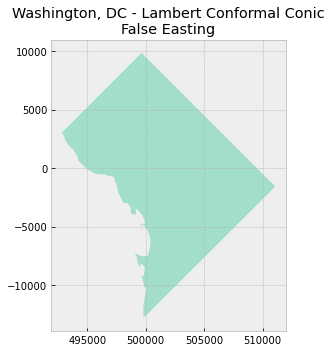

In [ ]:
# Create a copy of the DC shapefile
dc_lcc_false_e = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point, standard parallels, and false easting/northing
dc_lcc_false_e = dc_lcc_false_e.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +x_0=500000 +y_0=0 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_false_e], "Washington, DC - Lambert Conformal Conic\nFalse Easting")

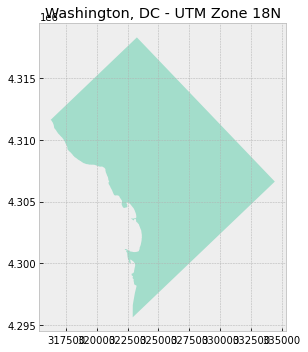

In [ ]:
# Create a copy of the DC shapefile
dc_utm18n = dc.copy()

# Reproject the data to UTM Zone 18N
# Source: https://www.spatialreference.org/ref/epsg/wgs-84-utm-zone-18n/
dc_utm18n = dc_utm18n.to_crs("+proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Map reprojected DC shapefile
map_data([dc_utm18n], "Washington, DC - UTM Zone 18N")

In [ ]:
#Отримання коду EPSG із рядка PROJ.4


# Import module
import pyproj

def get_epsg(proj4_string, min_confidence = 70):
    '''Function takes a PROJ.4 string and optional minimum confidence level as inputs and outputs the relevant EPSG code, if one exists. Source: https://geopandas.org/docs/user_guide/projections.html'''
    
    # Get relevant EPSG at the specified minimum confidence level
    return pyproj.CRS(proj4_string).to_epsg(min_confidence = min_confidence)


# Set variable to the PROJ.4 string of NAD83 / California zone 3
# Source: https://www.spatialreference.org/ref/epsg/26943/
proj4_full = "+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

# Call function to obtain relevant EPSG code
result = get_epsg(proj4_full)

# Print result
print("EPSG code for {}: {}.".format(proj4_full, result))

EPSG code for +proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs: 26943.


Векторні системи відліку координат (CRS)

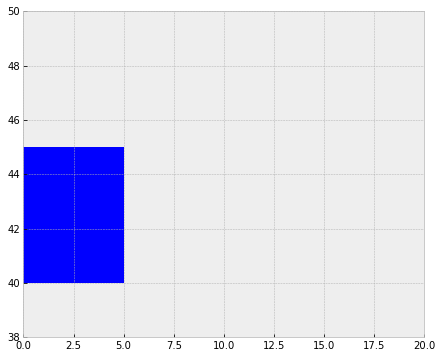

In [ ]:
#переконатися, що даним присвоєно проекцію

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
plt.style.use('bmh')  

a_square = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(0,45), Point(5,45), Point(5,40), Point(0,40)])]}

# create a dataframe from the nodes and assign the CRS
gdf_square = gpd.GeoDataFrame(a_square, crs="EPSG:4326")  
fig, ax = plt.subplots(figsize=(12, 6))
gdf_square.plot(ax=ax)
plt.ylim(38, 50)
plt.xlim(0, 20)
plt.show()

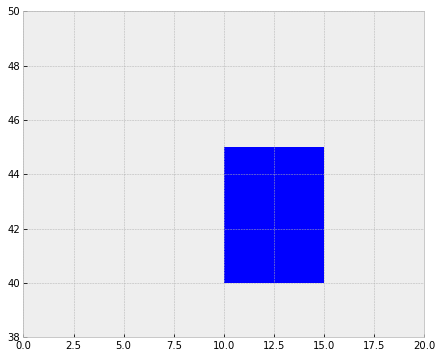

In [ ]:
#перемістити початковий меридіан на 10 градусів на захід

# reproject the data
gdf_square_10w = gdf_square.to_crs("+proj=longlat +datum=WGS84 +lon_0=-10")

fig, ax = plt.subplots(figsize=(12, 6))
gdf_square_10w.plot(ax=ax)
plt.ylim(38, 50)
plt.xlim(0, 20)
plt.show()

Растрові системи відліку координат (CRS)

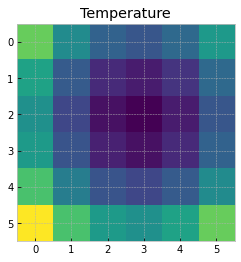

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

In [ ]:
xres = (x[-1] - x[0]) / len(x)
print('xres', xres)

yres = (y[-1] - y[0]) / len(y)
print('yres', + yres)

xres 30.0
yres -30.0


In [ ]:
from rasterio.transform import Affine
print(Affine.translation(x[0] - xres / 2, y[0] - yres / 2))

| 1.00, 0.00,-105.00|
| 0.00, 1.00, 105.00|
| 0.00, 0.00, 1.00|


In [ ]:
#записати tifфайл, який містить дані, Zі його тип даних з dtype, розташуванням, описаним transform,
#  у координатах, описаних системою відліку координат +proj=latlon,
#  кількістю «діапазонів» даних у count(у цьому випадку лише один), і форма в heightі width.

import rasterio
with rasterio.open(
    '../Z.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(Z, 1)

translate-матрицю можна використовувати для легкого знаходження координат будь-якої комірки на основі номера її рядка та стовпця. Наприклад, можна отримати координати верхнього правого кута цієї комірки. По суті, «відображає» індекси рядків і стовпців на координати!(column_number, row_number)translate

![raster](https://github.com/SergeyShchus/Data-analysis-Notebooks/blob/main/figures/c_raster_raster.png?raw=true)

In [ ]:
# координати верхнього лівого кута на основі :transform * (row_number, column_number)

print(transform*(0,0))

(-90.375, 89.625)


In [ ]:
#кут, який знаходиться на одну клітинку вниз (-30°) і праворуч (+30°)

print(transform*(1,1))

(-89.625, 90.375)


In [ ]:
#5-й стовпець праворуч, 2-й рядок внизу:

print(transform*(5,2))

(-86.625, 91.125)


In [ ]:
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling, calculate_default_transform

dst_crs = "EPSG:3857"  # web mercator(ie google maps)

with rasterio.open("https://github.com/SergeyShchus/Data-analysis-Notebooks/blob/main/Data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF") as src:

    # transform for input raster
    src_transform = src.transform

    # calculate the transform matrix for the output
    dst_transform, width, height = calculate_default_transform(
        src.crs,    # source CRS
        dst_crs,    # destination CRS
        src.width,    # column count
        src.height,  # row count
        *src.bounds,  # unpacks outer boundaries (left, bottom, right, top)
    )

print("Source Transform:\n",src_transform,'\n')
print("Destination Transform:\n", dst_transform)

RasterioIOError: '/vsicurl/https://github.com/SergeyShchus/Data-analysis-Notebooks/blob/main/Data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF' does not exist in the file system, and is not recognized as a supported dataset name.

In [ ]:
dst_crs = "EPSG:3857"  # web mercator(ie google maps)

with rasterio.open("../data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF") as src:
    src_transform = src.transform

    # calculate the transform matrix for the output
    dst_transform, width, height = calculate_default_transform(
        src.crs,
        dst_crs,
        src.width,
        src.height,
        *src.bounds,  # unpacks outer boundaries (left, bottom, right, top)
    )

    # set properties for output
    dst_kwargs = src.meta.copy()
    dst_kwargs.update(
        {
            "crs": dst_crs,
            "transform": dst_transform,
            "width": width,
            "height": height,
            "nodata": 0,  # replace 0 with np.nan
        }
    )

    with rasterio.open("../temp/LC08_20200518_webMC.tif", "w", **dst_kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )

RasterioIOError: ../data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF: No such file or directory

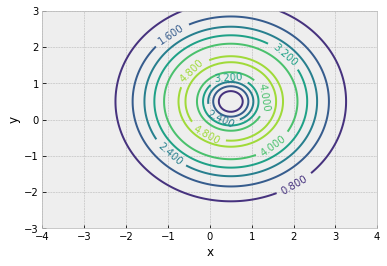

In [ ]:
#rasterio create data

import numpy as np
x = linspace(-4.0, 4.0, 240)
y = linspace(-3.0, 3.0, 180)
(X, Y) = meshgrid(x, y)
Z1 = exp(-2 * log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = exp(-3 * log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)
c = plt.contour(x,y,Z)
l = plt.clabel(c)
lx = plt.xlabel("x")
ly = plt.ylabel("y")
plt.show()


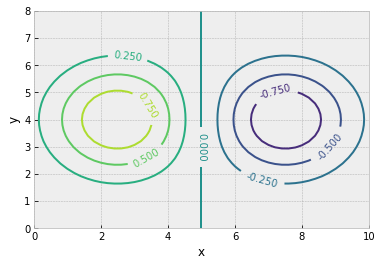

In [ ]:
x = linspace(0,10,51)
y = linspace(0,8,41)
(X,Y) = meshgrid(x,y)
a = exp(-((X-2.5)**2 + (Y-4)**2)/4) - exp(-((X-7.5)**2 + (Y-4)**2)/4)
c = plt.contour(x,y,a)
l = plt.clabel(c)
lx = plt.xlabel("x")
ly = plt.ylabel("y")
plt.show()

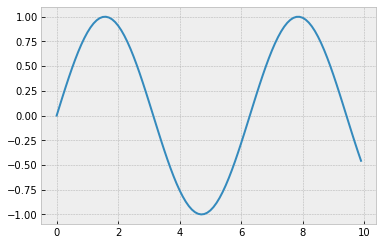

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
x = arange(0.,10.,0.1)
y = sin(x)
ll = plt.plot(x,y)
plt.show()

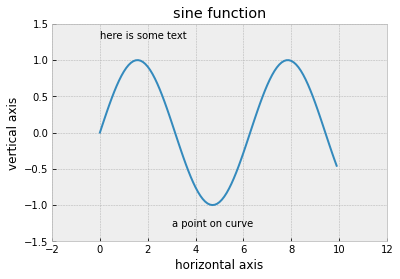

In [ ]:
ll = plt.plot(x,y)
xl = plt.xlabel('horizontal axis')
yl = plt.ylabel('vertical axis')
ttl = plt.title('sine function')
ax = plt.axis([-2, 12, -1.5, 1.5])
grd = plt.grid(True)
txt = plt.text(0,1.3,'here is some text')
ann = plt.annotate('a point on curve',xy=(4.7,-1),xytext=(3,-1.3),
    arrowprops=dict(arrowstyle='->'))
plt.show()

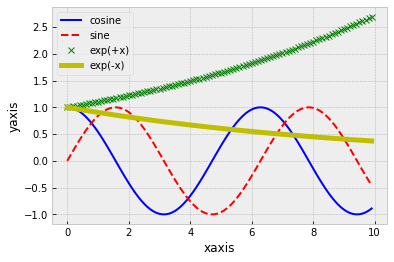

In [ ]:
x = arange(0.,10,0.1)
a = cos(x)
b = sin(x)
c = exp(x/10)
d = exp(-x/10)
la = plt.plot(x,a,'b-',label='cosine')
lb = plt.plot(x,b,'r--',label='sine')
lc = plt.plot(x,c,'gx',label='exp(+x)')
ld = plt.plot(x,d,'y-', linewidth = 5,label='exp(-x)')
ll = plt.legend(loc='upper left')
lx = plt.xlabel('xaxis')
ly = plt.ylabel('yaxis')
plt.show()

In [ ]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [ ]:
#новий стовпець m_pop_est

world['m_pop_est'] = world['pop_est'] / 1e6
world.head(4)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,m_pop_est
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.889953
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",58.005463
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.603253
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37.589262


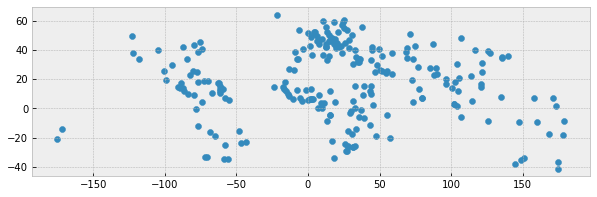

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

world_all = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))   
world_all.plot(figsize=(10,5))  
plt.show()

In [ ]:
world_all.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


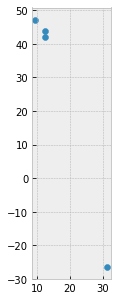

In [ ]:
#Вибір за позицією індексу 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.iloc[ 0:4 ]    
northern_world.plot(figsize=(10,5))  
plt.show()

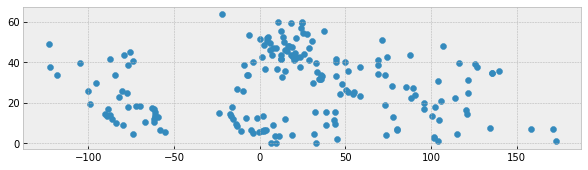

In [ ]:
#Піднабір точок за розташуванням 
#точки вище 0 градусів широти

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.cx[ : , 0: ]   # subsets all rows above 0 with a slice
northern_world.plot(figsize=(10, 5))
plt.show()


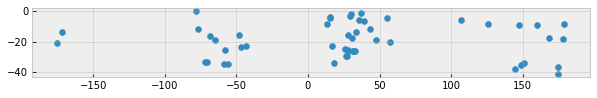

In [ ]:
#точки нижче 0 градусів широти


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
southern_world = world.cx[ : , :0 ]   # subsets all rows below 0  with a slice
southern_world.plot(figsize=(10, 5))
plt.show()

Аналіз буфера 

In [ ]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from io import StringIO 

data = """
ID,X,Y
1,  -87.789,  41.976
1,  -87.482,  41.677
2,  -87.599,  41.908
2,  -87.598,  41.708
2,  -87.643,  41.675
"""
# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep=',')

#zip the coordinates into a point object and convert to a GeoData Frame
points = [Point(xy) for xy in zip(df.X, df.Y)]
points = gpd.GeoDataFrame(df, geometry=points, crs = 'EPSG:4326')
# create line for each ID 
lines = points.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))
lines = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326") 
lines.reset_index(inplace=True)

<AxesSubplot:>

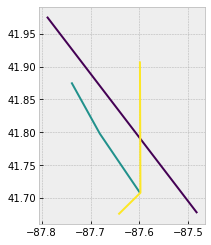

In [ ]:
# plot county outline and add wells to axis (ax)
lines.plot(column='ID')

In [ ]:
# plot county outline and add wells to axis (ax)
lines = lines.to_crs(3857)
# check the linear unit name in `unit_name`.
print(lines.crs.axis_info)

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]


0    POLYGON ((-9737657.488 5113325.388, -9737601.7...
1    POLYGON ((-9759751.621 5131293.150, -9750649.0...
2    POLYGON ((-9750364.761 5117342.850, -9750369.3...
dtype: geometry


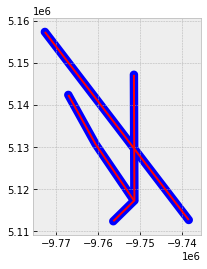

In [ ]:
buf = lines.buffer(distance = 1000)
bp = buf.plot()
lines.plot(ax=bp, color='red')
print(buf)

In [ ]:
line_buffer = lines.copy()
line_buffer['geometry'] = buf
print(line_buffer)

   ID                                           geometry
0   1  POLYGON ((-9737657.488 5113325.388, -9737601.7...
1   2  POLYGON ((-9759751.621 5131293.150, -9750649.0...
2   3  POLYGON ((-9750364.761 5117342.850, -9750369.3...


<AxesSubplot:>

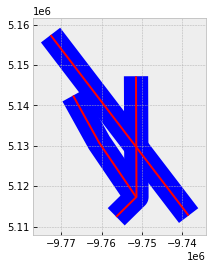

In [ ]:
buf = lines.buffer(distance = 3000, cap_style = 2)
bp = buf.plot()
lines.plot(ax=bp, color='red')

<AxesSubplot:>

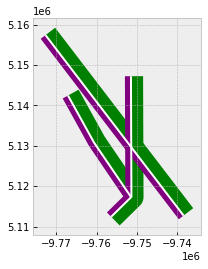

In [ ]:
buf_right = lines.buffer(distance = 3000, single_sided = True)
bp = buf_right.plot(color='green')

buf_left = lines.buffer(distance = -1500, single_sided = True)
buf_left.plot(ax=bp, color='purple')
lines.plot(ax=bp, color='white')

## Найближча точка за допомогою Shapely 

In [ ]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

orig = Point(1, 1.67)
dest1, dest2, dest3 = Point(0, 1.45), Point(2, 2), Point(0, 2.5)

In [ ]:
destinations = MultiPoint([dest1, dest2, dest3])
print(destinations)

MULTIPOINT (0 1.45, 2 2, 0 2.5)


In [ ]:
nearest_geoms = nearest_points(orig, destinations)
original_point, nearest_destination = nearest_geoms
print(nearest_geoms)
print('Coordinates of original point:',original_point)
print('Coordinates of closest destination point:',nearest_destination)

(<POINT (1 1.67)>, <POINT (0 1.45)>)
Coordinates of original point: POINT (1 1.67)
Coordinates of closest destination point: POINT (0 1.45)


## Найближчі точки за допомогою Geopandas 

In [ ]:
from shapely.ops import nearest_points

def _nearest(row, df1, df2, geom1='geometry', geom2='geometry', df2_column=None):
    """Find the nearest point and return the corresponding value from specified column."""

    # create object usable by Shapely
    geom_union = df2.unary_union

    # Find the geometry that is closest
    nearest = df2[geom2] == nearest_points(row[geom1], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    if df2_column is None:
        value = df2[nearest].index[0]
    else:
        value = df2[nearest][df2_column].values[0]
    return value

def nearest(df1, df2, geom1_col='geometry', geom2_col='geometry', df2_column=None):
    """Find the nearest point and return the corresponding value from specified column.
    :param df1: Origin points
    :type df1: geopandas.GeoDataFrame
    :param df2: Destination points
    :type df2: geopandas.GeoDataFrame
    :param geom1_col: name of column holding coordinate geometry, defaults to 'geometry'
    :type geom1_col: str, optional
    :param geom2_col: name of column holding coordinate geometry, defaults to 'geometry'
    :type geom2_col: str, optional
    :param df2_column: column name to return from df2, defaults to None
    :type df2_column: str, optional
    :return: df1 with nearest neighbor index or df2_column appended
    :rtype: geopandas.GeoDataFrame
    """
    df1['nearest_id'] = df1.apply(_nearest,  df1=df1, df2=df2, 
                                  geom1=geom1_col, geom2=geom2_col, 
                                  df2_column=df2_column, axis=1)
    return df1 

In [ ]:
# generate origin and destination points as geodataframe
orig = {'name': ['Origin_1','Origin_2'], 
     'geometry': [Point(-77.3,38.94),Point(-77.41,39.93)]}
orig = gpd.GeoDataFrame(orig, crs="EPSG:4326")
print(orig)

dest = {'name': ['Baltimore','Washington', 'Fredrick'], 
     'geometry': [ Point(-76.61,39.29,), Point(-77.04,38.91), Point(-77.40,39.41)]}
dest = gpd.GeoDataFrame(dest, crs="EPSG:4326")
print(dest)

       name                    geometry
0  Origin_1  POINT (-77.30000 38.94000)
1  Origin_2  POINT (-77.41000 39.93000)
         name                    geometry
0   Baltimore  POINT (-76.61000 39.29000)
1  Washington  POINT (-77.04000 38.91000)
2    Fredrick  POINT (-77.40000 39.41000)


In [ ]:
near = nearest(df1=orig, df2=dest, df2_column='name')
near.head()

,name,geometry,nearest_id
0,Origin_1,POINT (-77.30000 38.94000),Washington
1,Origin_2,POINT (-77.41000 39.93000),Fredrick


## Об'єднати дані та розчинити багатокутники 
з доступом через API

In [ ]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import os

In [ ]:
#ignore this, I am just reading in my api key privately
c = Census(os.environ.get('611bc7d8179807514483b1abe27f3e7a52abb2b1'))

In [ ]:
# Obtain Census variables from the 2019 ACS at the tract level for the Commonwealth of Virginia (FIPS code: 51)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
va_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.VA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2017)

In [ ]:
# Create a dataframe from the census data
va_df = pd.DataFrame(va_census)

# Show the dataframe
print(va_df.head(2))
print('Shape: ', va_df.shape)

                                         NAME  C17002_001E  C17002_002E  \
0     Census Tract 60, Norfolk city, Virginia       3947.0        284.0   
1  Census Tract 65.02, Norfolk city, Virginia       3287.0        383.0   

   C17002_003E  B01003_001E state county   tract  
0        507.0       3947.0    51    710  006000  
1        480.0       3302.0    51    710  006502  
Shape:  (1907, 8)


In [ ]:
# шейп-файл районів перепису населення Вірджинії

# Access shapefile of Virginia census tracts
va_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_51_tract.zip")

# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
va_tract = va_tract.to_crs(epsg = 32617)

# Print GeoDataFrame of shapefile
print(va_tract.head(2))
print('Shape: ', va_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(va_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      51      700  032132  51700032132  321.32  Census Tract 321.32  G5020   
1      51      700  032226  51700032226  322.26  Census Tract 322.26  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2552457       0  +37.1475176  -076.5212499   
1        S  3478916  165945  +37.1625163  -076.5527816   

                                            geometry  
0  POLYGON ((897173.396 4119897.287, 897174.015 4...  
1  POLYGON ((893469.801 4123469.592, 893541.960 4...  
Shape:  (1907, 13)

The shapefile projection is: EPSG:32617


In [ ]:
# Combine state, county, and tract columns together to create a new string and assign to new column
va_df["GEOID"] = va_df["state"] + va_df["county"] + va_df["tract"]

In [ ]:
# Print head of dataframe
va_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,state,county,tract,GEOID
0,"Census Tract 60, Norfolk city, Virginia",3947.0,284.0,507.0,3947.0,51,710,006000,51710006000
1,"Census Tract 65.02, Norfolk city, Virginia",3287.0,383.0,480.0,3302.0,51,710,006502,51710006502


In [ ]:
# Remove columns
va_df = va_df.drop(columns = ["state", "county", "tract"])

# Show updated dataframe
va_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,GEOID
0,"Census Tract 60, Norfolk city, Virginia",3947.0,284.0,507.0,3947.0,51710006000
1,"Census Tract 65.02, Norfolk city, Virginia",3287.0,383.0,480.0,3302.0,51710006502


In [ ]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(va_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(va_tract.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
C17002_001E    float64
C17002_002E    float64
C17002_003E    float64
B01003_001E    float64
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [ ]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
va_merge = va_tract.merge(va_df, on = "GEOID")

# Show result
print(va_merge.head(2))
print('Shape: ', va_merge.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  NAME_x             NAMELSAD  MTFCC  \
0      51      700  032132  51700032132  321.32  Census Tract 321.32  G5020   
1      51      700  032226  51700032226  322.26  Census Tract 322.26  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2552457       0  +37.1475176  -076.5212499   
1        S  3478916  165945  +37.1625163  -076.5527816   

                                            geometry  \
0  POLYGON ((897173.396 4119897.287, 897174.015 4...   
1  POLYGON ((893469.801 4123469.592, 893541.960 4...   

                                             NAME_y  C17002_001E  C17002_002E  \
0  Census Tract 321.32, Newport News city, Virginia       5025.0        161.0   
1  Census Tract 322.26, Newport News city, Virginia       4167.0        736.0   

   C17002_003E  B01003_001E  
0        342.0       5079.0  
1        559.0       4167.0  
Shape:  (1907, 18)


In [ ]:
# Create new dataframe from select columns
va_poverty_tract = va_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

# Show dataframe
print(va_poverty_tract.head(2))
print('Shape: ', va_poverty_tract.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      51      700  032132  51700032132   
1      51      700  032226  51700032226   

                                            geometry  C17002_001E  \
0  POLYGON ((897173.396 4119897.287, 897174.015 4...       5025.0   
1  POLYGON ((893469.801 4123469.592, 893541.960 4...       4167.0   

   C17002_002E  C17002_003E  B01003_001E  
0        161.0        342.0       5079.0  
1        736.0        559.0       4167.0  
Shape:  (1907, 9)


In [ ]:
# Dissolve and group the census tracts within each county and aggregate all the values together
# Source: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html
va_poverty_county = va_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')

# Show dataframe
print(va_poverty_county.head(2))
print('Shape: ', va_poverty_county.shape)

                                                   geometry  C17002_001E  \
COUNTYFP                                                                   
001       POLYGON ((971813.440 4160129.957, 971663.539 4...      32345.0   
003       POLYGON ((722871.145 4189239.852, 722813.435 4...      97587.0   

          C17002_002E  C17002_003E  B01003_001E  
COUNTYFP                                         
001            2423.0       3993.0      32840.0  
003            5276.0       4305.0     105105.0  
Shape:  (133, 5)


In [ ]:
# Get poverty rate and store values in new column
va_poverty_county["Poverty_Rate"] = (va_poverty_county["C17002_002E"] + va_poverty_county["C17002_003E"]) / va_poverty_county["B01003_001E"] * 100

# Show dataframe
va_poverty_county.head(2)

,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,Poverty_Rate
COUNTYFP,,,,,,
001,"POLYGON ((971813.440 4160129.957, 971663.539 4...",32345.0,2423.0,3993.0,32840.0,19.537150
003,"POLYGON ((722871.145 4189239.852, 722813.435 4...",97587.0,5276.0,4305.0,105105.0,9.115646


Text(0.5, 1.0, 'Poverty Rates (%) in Virginia')

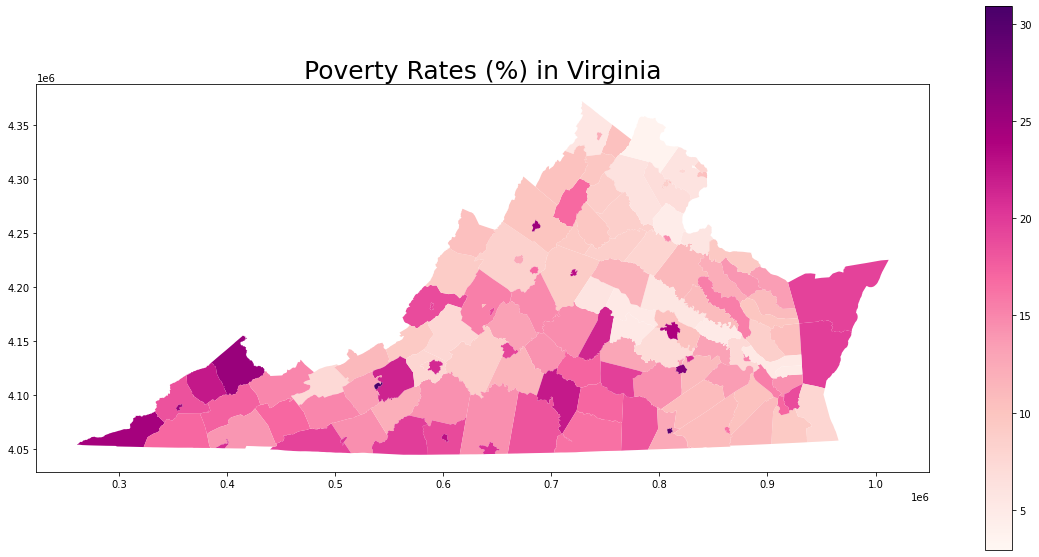

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
va_poverty_county.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Virginia', fontdict = {'fontsize': '25', 'fontweight' : '3'})

--------------------------
--------------------------

## Вимірювання щільності точок - підрахунок і щільність ядер 

In [ ]:
# Import modules
import geopandas as gpd
import geoplot as gplt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import Affine
from scipy import stats
from shapely.geometry import Polygon, box
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

In [ ]:
# Load data

# County boundaries
# Source: https://opendata.mtc.ca.gov/datasets/san-francisco-bay-region-counties-clipped?geometry=-125.590%2C37.123%2C-119.152%2C38.640
counties = gpd.read_file("/content/village_councils.shp")

# Well locations
# Source: https://gis.data.ca.gov/datasets/3a3e681b894644a9a95f9815aeeeb57f_0?geometry=-123.143%2C36.405%2C-119.230%2C37.175
# Modified by author so that only the well locations within the counties and the surrounding 50 km were kept
wells = gpd.read_file("/content/village.shp")

# Reproject data to NAD83(HARN) / California Zone 3
# https://spatialreference.org/ref/epsg/2768/
proj = 2768
counties = counties.to_crs(proj)
wells = wells.to_crs(proj)

# Create a column that assigns each well a number
wells["Well_ID"] = np.arange(wells.shape[0])

In [ ]:
def create_grid(feature, shape, side_length):
    '''Create a grid consisting of either rectangles or hexagons with a specified side length that covers the extent of input feature.'''

    # Slightly displace the minimum and maximum values of the feature extent by creating a buffer
    # This decreases likelihood that a feature will fall directly on a cell boundary (in between two cells)
    # Buffer is projection dependent (due to units)
    feature = feature.buffer(20)

    # Get extent of buffered input feature
    min_x, min_y, max_x, max_y = feature.total_bounds


    # Create empty list to hold individual cells that will make up the grid
    cells_list = []

    # Create grid of squares if specified
    if shape in ["square", "rectangle", "box"]:

        # Adapted from https://james-brennan.github.io/posts/fast_gridding_geopandas/
        # Create and iterate through list of x values that will define column positions with specified side length
        for x in np.arange(min_x - side_length, max_x + side_length, side_length):

            # Create and iterate through list of y values that will define row positions with specified side length
            for y in np.arange(min_y - side_length, max_y + side_length, side_length):

                # Create a box with specified side length and append to list
                cells_list.append(box(x, y, x + side_length, y + side_length))


    # Otherwise, create grid of hexagons
    elif shape == "hexagon":

        # Set horizontal displacement that will define column positions with specified side length (based on normal hexagon)
        x_step = 1.5 * side_length

        # Set vertical displacement that will define row positions with specified side length (based on normal hexagon)
        # This is the distance between the centers of two hexagons stacked on top of each other (vertically)
        y_step = math.sqrt(3) * side_length

        # Get apothem (distance between center and midpoint of a side, based on normal hexagon)
        apothem = (math.sqrt(3) * side_length / 2)

        # Set column number
        column_number = 0

        # Create and iterate through list of x values that will define column positions with vertical displacement
        for x in np.arange(min_x, max_x + x_step, x_step):

            # Create and iterate through list of y values that will define column positions with horizontal displacement
            for y in np.arange(min_y, max_y + y_step, y_step):

                # Create hexagon with specified side length
                hexagon = [[x + math.cos(math.radians(angle)) * side_length, y + math.sin(math.radians(angle)) * side_length] for angle in range(0, 360, 60)]

                # Append hexagon to list
                cells_list.append(Polygon(hexagon))

            # Check if column number is even
            if column_number % 2 == 0:

                # If even, expand minimum and maximum y values by apothem value to vertically displace next row
                # Expand values so as to not miss any features near the feature extent
                min_y -= apothem
                max_y += apothem

            # Else, odd
            else:

                # Revert minimum and maximum y values back to original
                min_y += apothem
                max_y -= apothem

            # Increase column number by 1
            column_number += 1

    # Else, raise error
    else:
        raise Exception("Specify a rectangle or hexagon as the grid shape.")

    # Create grid from list of cells
    grid = gpd.GeoDataFrame(cells_list, columns = ['geometry'], crs = proj)

    # Create a column that assigns each grid a number
    grid["Grid_ID"] = np.arange(len(grid))

    # Return grid
    return grid

### Спосіб 1 - Групування

In [ ]:
# Set side length for cells in grid
# This is dependent on projection chosen as length is in units specified in projection
side_length = 5000

# Set shape of grid
shape = "hexagon"
# shape = "rectangle"

Text(0.5, 1.0, 'Crimea Bay Area - Boundaries, Wells, and Grids')

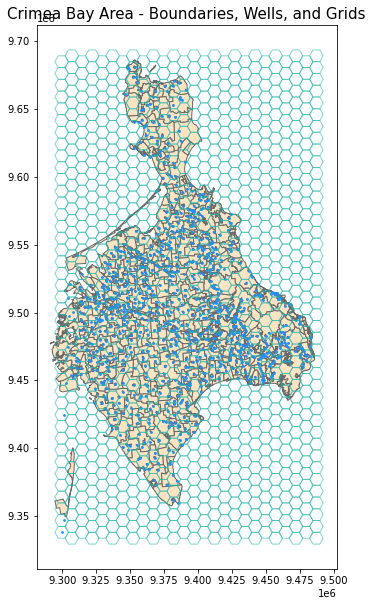

In [ ]:
# Create grid
bay_area_grid = create_grid(feature = wells, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
bay_area_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('Crimea Bay Area - Boundaries, Wells, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [ ]:
# Perform spatial join, merging attribute table of wells point and that of the cell with which it intersects
# op = "intersects" also counts those that fall on a cell boundary (between two cells)
# op = "within" will not count those fall on a cell boundary
wells_cell = gpd.sjoin(wells, bay_area_grid, how = "inner", op = "intersects")

# Remove duplicate counts
# With intersect, those that fall on a boundary will be allocated to all cells that share that boundary
wells_cell = wells_cell.drop_duplicates(subset = ['Well_ID']).reset_index(drop = True)

# Set field name to hold count value
count_field = "Count"

# Add a field with constant value of 1
wells_cell[count_field] = 1

# Group GeoDataFrame by cell while aggregating the Count values
wells_cell = wells_cell.groupby('Grid_ID').agg({count_field:'sum'})

# Merge the resulting grouped dataframe with the grid GeoDataFrame, using a left join to keep all cell polygons
bay_area_grid = bay_area_grid.merge(wells_cell, on = 'Grid_ID', how = "left")

# Fill the NaN values (cells without any points) with 0
bay_area_grid[count_field] = bay_area_grid[count_field].fillna(0)

# Convert Count field to integer
bay_area_grid[count_field] = bay_area_grid[count_field].astype(int)

# Display grid attribute table
display(bay_area_grid)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,geometry,Grid_ID,Count
0,"POLYGON ((9304641.494 9338219.875, 9302141.494...",0,1
1,"POLYGON ((9304641.494 9346880.129, 9302141.494...",1,1
2,"POLYGON ((9304641.494 9355540.383, 9302141.494...",2,0
3,"POLYGON ((9304641.494 9364200.638, 9302141.494...",3,0
4,"POLYGON ((9304641.494 9372860.892, 9302141.494...",4,0
...,...,...,...
1074,"POLYGON ((9492141.494 9654319.148, 9489641.494...",1074,0
1075,"POLYGON ((9492141.494 9662979.402, 9489641.494...",1075,0
1076,"POLYGON ((9492141.494 9671639.656, 9489641.494...",1076,0
1077,"POLYGON ((9492141.494 9680299.910, 9489641.494...",1077,0


Text(0.5, 1.0, 'Crimea Area - Binning Well Points')

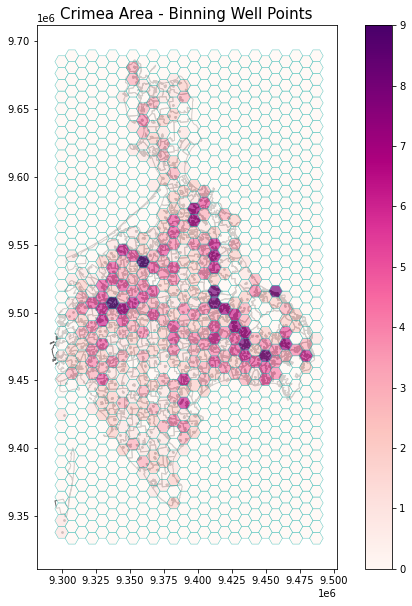

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
bay_area_grid.plot(ax = ax, column = "Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('Crimea Area - Binning Well Points', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [ ]:
# Check total number of well points counted and compare to number of well points in input data
print("Total number of well points counted: {}\nNumber of well points in input data: {}".format(sum(bay_area_grid.Count), len(wells)))

Total number of well points counted: 974
Number of well points in input data: 974


### Спосіб 2. Ітерація

In [ ]:
counties.head(5)

,admin3Name,admin3Na_1,admin3Na_2,admin3Pcod,admin3RefN,admin2Name,admin2Na_1,admin2Na_2,admin2Pcod,admin1Name,...,orendar,subdivisio,Check_edit,COATYY,Sil_rada,Silrada_z_,ПІП,area_field,AREA_viz,geometry
0,Abrykosivska,Абрикосівська,Абрикосовский,UA0121680100,Abrykosivska,Kirovskyi,Кіровський,Кировский,UA01216,Avtonomna Respublika Krym,...,0,NaN,NaN,0121680100,Абрикосівська,NaN,NaN,0.0,NaN,"POLYGON ((9391906.479 9567967.615, 9392138.663..."
1,Abrykosivska,Абрикосівська,Абрикосовский,UA0123580200,Abrykosivska,Pervomaiskyi,Первомайський,Первомайский,UA01235,Avtonomna Respublika Krym,...,0,NaN,NaN,0123580200,Абрикосівська,NaN,NaN,0.0,NaN,"POLYGON ((9338927.475 9483606.479, 9339136.686..."
2,Alupkynska,Алупкинська,Алупкинский,UA0111970200,Alupkynska,Yaltynska,Ялтинська,Ялтинский,UA01119,Avtonomna Respublika Krym,...,0,NaN,NaN,0111970200,Алупкинська,NaN,NaN,0.0,NaN,"POLYGON ((9477192.620 9490660.407, 9477219.211..."
3,Alushtynska,Алуштинська,Алуштинский,UA0110300000,Alushtynska,Alushtynska,Алуштинська,Алуштинский,UA01103,Avtonomna Respublika Krym,...,0,NaN,NaN,0110300000,Алуштинська,NaN,NaN,0.0,NaN,"POLYGON ((9448046.434 9516927.182, 9448143.438..."
4,Amurska,Амурська,Амурский,UA0122080600,Amurska,Krasnohvardiiskyi,Красногвардійський,Красногвардейский,UA01220,Avtonomna Respublika Krym,...,0,NaN,NaN,0122080600,Амурська,NaN,NaN,0.0,NaN,"POLYGON ((9377141.045 9488381.179, 9377823.061..."


In [ ]:
# Select the Santa Clara County boundary
sc_county = counties[counties["admin1Name"] == "Avtonomna Respublika Krym"]

# Subset the GeoDataFrame by checking which wells are within Santa Clara County
sc_county_wells = wells[wells.within(sc_county.geometry.values[0])]

Text(0.5, 1.0, 'Первомайський County - Boundaries, Wells, and Grids')

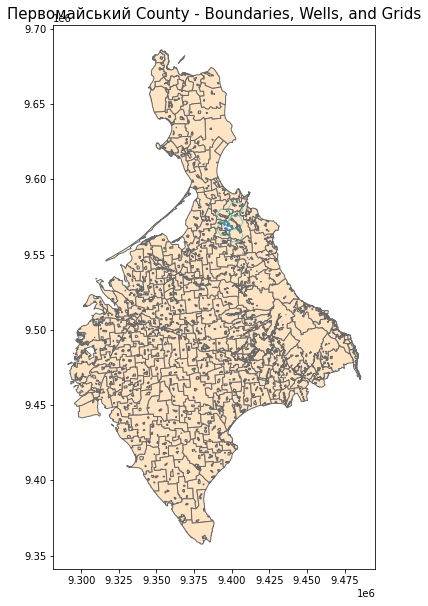

In [ ]:
# Create grid
sc_county_grid = create_grid(feature = sc_county_wells, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
sc_county.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
sc_county_wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
sc_county_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('Первомайський County - Boundaries, Wells, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [ ]:
# Create empty list used to hold count values for each grid
counts_list = []

# Create empty list to hold index of points that have already been matched to a grid
counted_points = []

# Iterate through each cell in grid
for i_1 in range(0, sc_county_grid.shape[0]):

    # Get a cell by index
    cell = sc_county_grid.iloc[[i_1]]

    # Reset index of cell to 0
    cell = cell.reset_index(drop = True)

    # Set point count to 0
    count = 0

    # Iterate through each feature in wells dataset
    for i_2 in range(0, sc_county_wells.shape[0]):

        # Check if index of point is in list of indices whose points have already been matched to a grid and counted
        if i_2 in counted_points:

            # If already counted, skip remaining statements in loop and start at top of loop
            continue

        # Otherwise, continue with remaining statements
        else:
            pass

        # Get a well point by index
        well = sc_county_wells.iloc[[i_2]]

        # Reset index of well point (to 0) to match the index-reset cell
        well = well.reset_index(drop = True)

        # Check if well intersects the cell
        # Best to use intersects instead of within or contains, as intersect will count points that fall exactly on the cell boundaries
        # Points that fall exactly on a cell boundary (between two cells) will be allocated to the first of the two cells called in script
        criteria_met = well.intersects(cell)[0]

        # If preferred, can check if well is within cell or if cell contains well
        # Both statements do the same thing
        # criteria_met = well.within(cell)[0]
        # criteria_met = cell.contains(well)[0]

        # Check if criteria has been met (True)
        if criteria_met:

            # If True, increase counter by 1 for the cell
            count += 1

            # Add index of counted point to the list
            counted_points.append(i_2)

        # Otherwise, criteria is not met (False)
        else:
            pass

    # Add total count for that cell to the list of counts
    counts_list.append(count)

# print(counts_list)

# Add a new column to the grid GeoDataFrame with the list of counts for each cell
sc_county_grid['Count'] = pd.Series(counts_list)

# Display grid attribute table
display(sc_county_grid)

,geometry,Grid_ID,Count
0,"POLYGON ((9400030.962 9567163.141, 9397530.962...",0,3
1,"POLYGON ((9400030.962 9575823.396, 9397530.962...",1,0
2,"POLYGON ((9407530.962 9562833.014, 9405030.962...",2,0
3,"POLYGON ((9407530.962 9571493.268, 9405030.962...",3,1
4,"POLYGON ((9407530.962 9580153.523, 9405030.962...",4,0


In [ ]:
# Check total number of well points counted and compare to number of well points in input data
print("Total number of well points counted: {}\nNumber of well points in input data: {}".format(sum(counts_list), len(sc_county_wells)))

Total number of well points counted: 4
Number of well points in input data: 4


Text(0.5, 1.0, 'Crimea County - Binning Well Points')

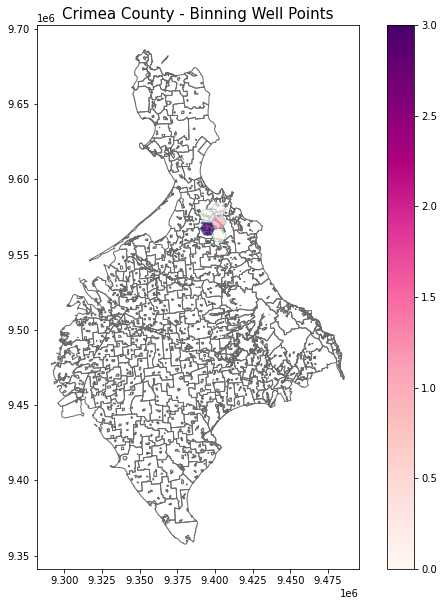

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
sc_county.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
sc_county_wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
sc_county_grid.plot(ax = ax, column = "Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('Crimea County - Binning Well Points', fontdict = {'fontsize': '15', 'fontweight' : '3'})

## Оцінка щільності ядра

Text(0.5, 1.0, 'Crimea Bay Area - Kernel Density Estimation for Wells')

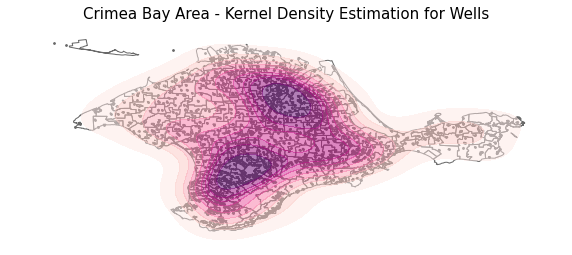

In [ ]:
# Set projection to WGS 84 and reproject data
proj_wgs = 4326
counties_wgs = counties.to_crs(proj_wgs)
wells_wgs = wells.to_crs(proj_wgs)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
wells_wgs.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
gplt.kdeplot(wells_wgs,ax=ax,shade = True,cmap = "RdPu",alpha = 0.5) 

# Set title
ax.set_title('Crimea Bay Area - Kernel Density Estimation for Wells', fontdict = {'fontsize': '15', 'fontweight' : '3'})

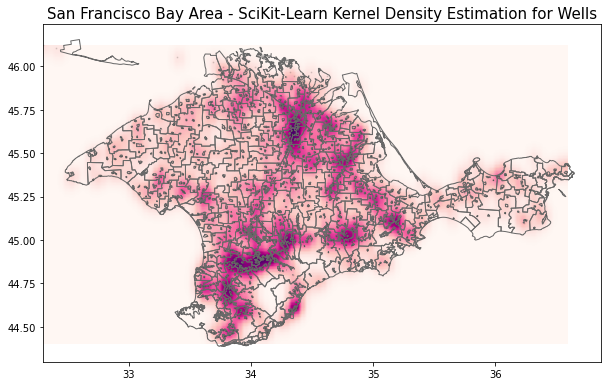

In [ ]:
# Get X and Y coordinates of well points
x_sk = wells_wgs["geometry"].x
y_sk = wells_wgs["geometry"].y

# Get minimum and maximum coordinate values of well points
min_x_sk, min_y_sk, max_x_sk, max_y_sk = wells_wgs.total_bounds

# Create a cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk, YY_sk = np.mgrid[min_x_sk:max_x_sk:100j, min_y_sk:max_y_sk:100j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk = np.vstack([XX_sk.ravel(), YY_sk.ravel()]).T

# Create 2-D array of the coordinate values of the well points
Xtrain_sk = np.vstack([x_sk, y_sk]).T

# Get kernel density estimator (can change parameters as desired)
kde_sk = KernelDensity(bandwidth = 0.04, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Fit kernel density estimator to wells coordinates
kde_sk.fit(Xtrain_sk)

# Evaluate the estimator on coordinate pairs
Z_sk = np.exp(kde_sk.score_samples(positions_sk))

# Reshape the data to fit mesh grid
Z_sk = Z_sk.reshape(XX_sk.shape)

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z_sk), cmap = "RdPu", extent = [min_x_sk, max_x_sk, min_y_sk, max_y_sk])
ax.plot(x_sk, y_sk, 'k.', markersize = 2, alpha = 0.1)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
ax.set_title('San Francisco Bay Area - SciKit-Learn Kernel Density Estimation for Wells', fontdict = {'fontsize': '15', 'fontweight' : '3'})
plt.show()

In [ ]:
#експорт растру

def export_kde_raster(Z, XX, YY, min_x, max_x, min_y, max_y, proj, filename):
    '''Export and save a kernel density raster.'''

    # Flip array vertically and rotate 270 degrees
    Z_export = np.rot90(np.flip(Z, 0), 3)

    # Get resolution
    xres = (max_x - min_x) / len(XX)
    yres = (max_y - min_y) / len(YY)

    # Set transform
    transform = Affine.translation(min_x - xres / 2, min_y - yres / 2) * Affine.scale(xres, yres)

    # Export array as raster
    with rasterio.open(
            filename,
            mode = "w",
            driver = "GTiff",
            height = Z_export.shape[0],
            width = Z_export.shape[1],
            count = 1,
            dtype = Z_export.dtype,
            crs = proj,
            transform = transform,
    ) as new_dataset:
            new_dataset.write(Z_export, 1)